# Analyse goodness of fit

In [1]:
# data + modelling
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

In [2]:
expt1 = pd.read_csv('analysis/EXPERIMENT_1_RESULTS.csv')
expt2 = pd.read_csv('analysis/EXPERIMENT_2_RESULTS.csv')

# add Experiment column
def new_col_of_value(df, colname, value):
    '''Add column representing experiment number'''
    df[colname] = pd.Series(value, index=df.index)
    return df

expt1 = new_col_of_value(expt1, 'Experiment', 1)
expt2 = new_col_of_value(expt2, 'Experiment', 2)

# gather desired columns from both experiments and concatenate into new dataframe
data = pd.concat( [expt1[['log_loss', 'percent_predicted', 'Experiment']],
                   expt2[['log_loss', 'percent_predicted', 'Experiment']]])

# improved labels
data = data.rename(index=str, columns={"log_loss": "Log Loss",
                                       "percent_predicted": "Proportion Predicted"})

Plotting

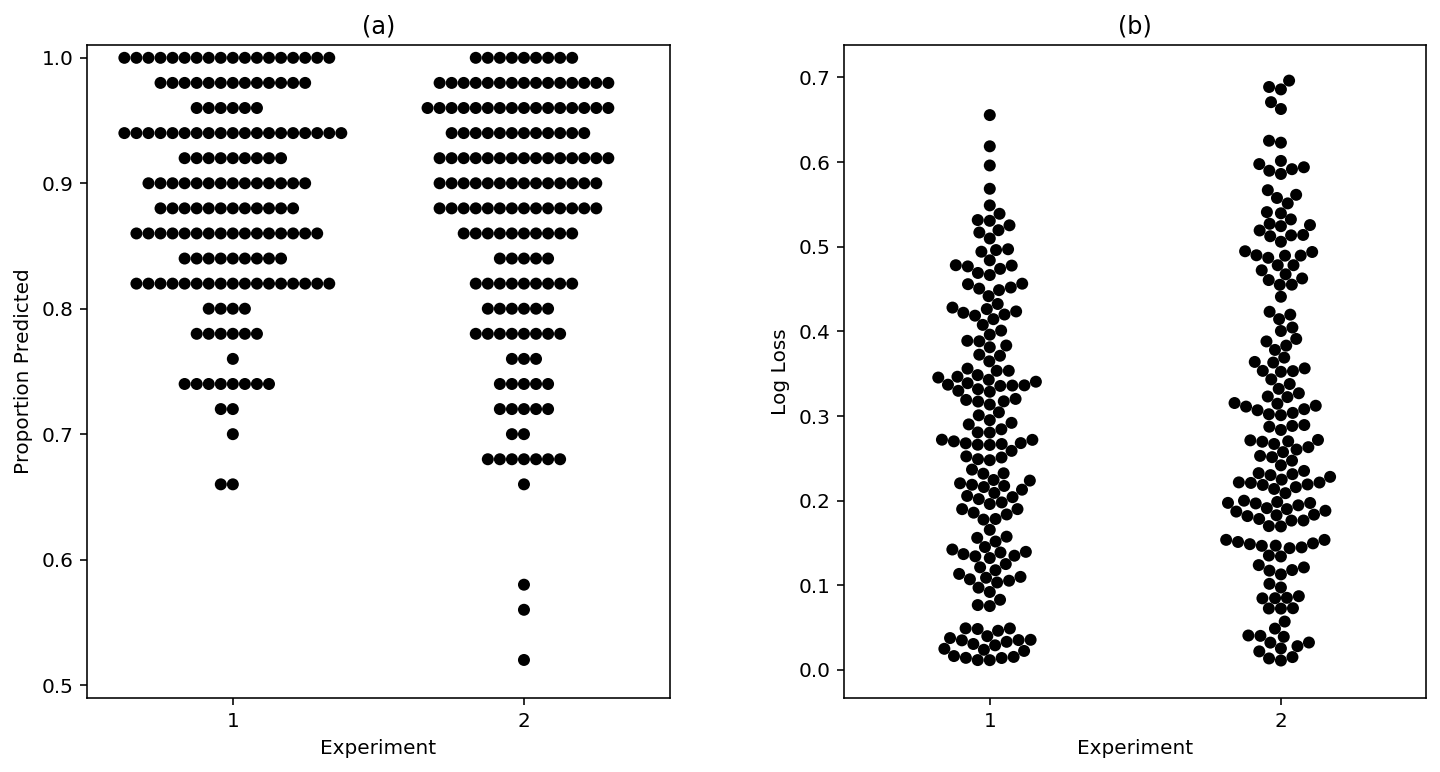

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.swarmplot(x="Experiment", y="Proportion Predicted", data=data, ax=ax[0],
             size=6, color='k')
ax[0].set(title="(a)", ylim=[0.5-0.01, 1.01])

sns.swarmplot(x="Experiment", y="Log Loss", data=data, ax=ax[1],
             size=6, color='k')
ax[1].set_title("(b)")

# increase spacing
plt.subplots_adjust(wspace=0.3)

plt.savefig('output/goodness_of_fit.pdf', bbox_inches='tight')

Calculate the summary statistics of each measure, for each experiment.

In [4]:
data.groupby(['Experiment']).median()

,Log Loss,Proportion Predicted
Experiment,,
1,0.267857,0.9
2,0.270568,0.9


In [5]:
data.groupby(['Experiment']).std()

,Log Loss,Proportion Predicted
Experiment,,
1,0.159304,0.081249
2,0.176919,0.104535
